In [193]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs
import os

In [194]:
!pwd
!ls

/Users/lockepatton/Desktop/2020-ASTR100/Notes/2020_02_06_Photometry
2020_02_06_Aperture_Photometry_The_Easier_Way.ipynb
Untitled.ipynb
data


# same file as we've worked with before - let's open it up

1337.2761 1091.3668


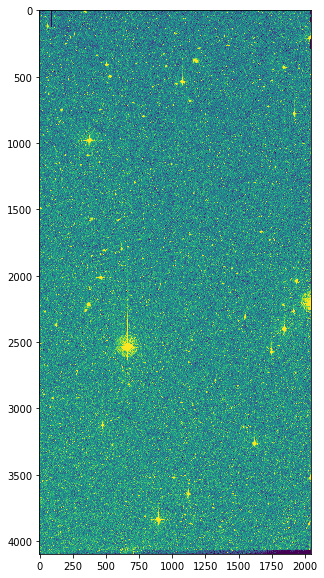

In [195]:
dir_ = '/Users/lockepatton/Desktop/2020-ASTR100/Notes/2020_02_04_Astropy_and_Fits/data/'
imageName = dir_+ 'PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits'
f = fits.open(imageName)
data = f[0].data  #This is the image array
header = f[0].header

mean = np.mean(data)
median = np.median(data)
sigma = np.std(data)

print(mean, sigma)

#plot the image with some reasonable scale
plt.figure(figsize=(10,10))
plt.imshow(data, vmin=median-.1*sigma, vmax=median+.1*sigma)
plt.show()

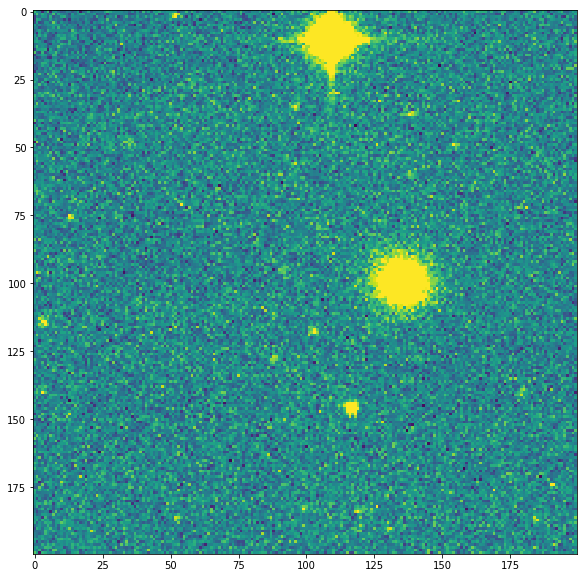

In [196]:
plt.figure(figsize=(10,10))
plt.imshow(data[400:600,400:600], vmin=median-.1*sigma, vmax=median+.1*sigma)
plt.show()

# zooming in on a star

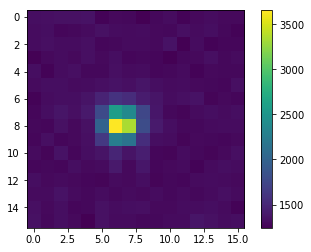

In [197]:
cx = 518
cy = 546
sx = 16
sy = 16

xmin, xmax = cx-sx//2, cx+sx//2
ymin, ymax = cy-sy//2, cy+sy//2

stamp = data[ymin:ymax,xmin:xmax]
plt.imshow(stamp)
plt.colorbar();

# first let's create a little function "disk"

It returns a 2D array that has 1's if it's within a defined radius and 0's otherwise.

In [212]:
def disc(sx, sy, rad):
    xbox = np.arange(sx*sy).reshape(sy,sx) % sx - (sx-1)/2
    ybox = np.arange(sx*sy).reshape(sy,sx) // sx - (sy-1)/2
    rbox = np.sqrt(xbox*xbox + ybox*ybox)
    return (rbox < rad).astype("int8")

# next let's do some aperture photometry!

We define an aperture "ap" using the disk function. This will be the region that we're looking to sum.

We'll also define a annulus "ann", which is created using the difference between two disc calls.

Using these combined, we can measure a background either mean or median of the annulus.

Our final value for the photometry is then the sum of the stamp within the aperture region minus the background times the number of pixels in the aperture.

In [204]:
def ap_phot(stamp, rad, skyrad):
    sy, sx = stamp.shape
    
    ap = disc(sx, sy, rad)
    ann = disc(sx, sy, skyrad[1]) - disc(sx, sy, skyrad[0])
    
#     background = np.sum(ann * stamp)/np.sum(ann) # mean background value
    background = np.mean(stamp[ann==1]) # mean background value
    background = np.median(stamp[ann==1]) # median background value
    
    print("sky background is:", background)        
    
    npix = np.sum(ap) # number of pixels in aperture
    phot = np.sum(stamp*ap) - background*npix
    phot = np.sum((stamp-background)*ap)
    return phot

In [205]:
disc(sx, sy, 4)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [206]:
disc(sx, sy, 8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

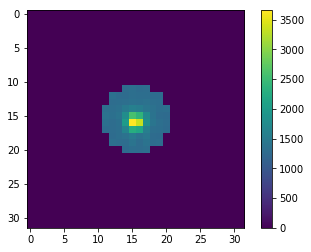

In [207]:
cx = 517
cy = 546
sx = 16*2
sy = 16*2

xmin, xmax = cx-sx//2, cx+sx//2
ymin, ymax = cy-sy//2, cy+sy//2

stamp = data[ymin:ymax,xmin:xmax]

rad = 5
skyrad = (8,10)
ap = disc(sx, sy, rad)
ann = disc(sx, sy, skyrad[1]) - disc(sx, sy, skyrad[0])

plt.imshow(stamp*ap)
plt.colorbar();

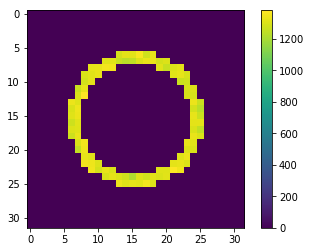

In [208]:
plt.imshow(stamp*ann)
plt.colorbar();

In [209]:
ap_phot(stamp, rad=rad, skyrad=skyrad)

sky background is: 1311.8599537037037


13283.051

# for extra kicks

Let's take a look at how it changes as we change the inner radius!

sky background is: 1311.8599537037037
sky background is: 1311.8599537037037
sky background is: 1311.8599537037037
sky background is: 1311.8599537037037
sky background is: 1311.8599537037037
sky background is: 1311.8599537037037
sky background is: 1311.8599537037037
sky background is: 1311.8599537037037
sky background is: 1311.8599537037037
sky background is: 1311.8599537037037


Text(0, 0.5, 'Photometry value | pixels')

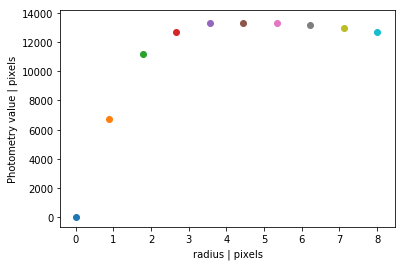

In [217]:
radii = np.linspace(0,skyrad[0],10)

for rad in radii:
    apvalue = ap_phot(stamp, rad=rad, skyrad=skyrad)
    plt.scatter(rad, apvalue)
    
plt.xlabel('radius | pixels')
plt.ylabel('Photometry value | pixels')